<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/overfitting/overfitting_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from IPython import display
display.set_matplotlib_formats('svg')

## Create the data and the model

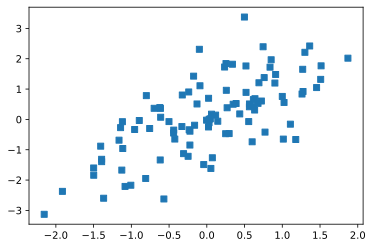

In [ ]:
N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)
plt.plot(x,y,'s')
plt.show()

In [48]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [49]:
learning_rate = .05
loss_fun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)

## Select data for training

In [14]:
train_size = int(0.8 * len(x))
trainidx = np.random.choice(range(N), train_size, replace=False)
train_bool = np.zeros(N, dtype=bool)
train_bool[trainidx] = True

print(x[train_bool].shape)
print(x[~train_bool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


## Train the model

In [8]:
num_epochs = 500
for epochi in range(num_epochs):
  yHat = ANNreg(x[train_bool])
  loss = loss_fun(yHat, y[train_bool])

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [9]:
pred_y_test = ANNreg(x[~train_bool])
testloss = (pred_y_test - y[~train_bool]).pow(2).mean()

In [10]:
print(f'Final train loss: {loss:.2f}')
print(f'Final test loss: {testloss:.2f}')

Final train loss: 0.88
Final test loss: 0.65


## Plot the data

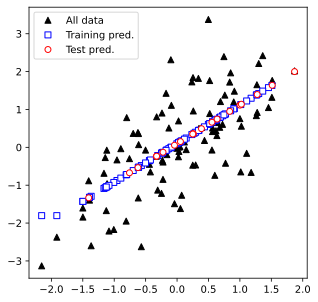

In [11]:
pred_y_train = ANNreg(x[train_bool]).detach().numpy()
plt.figure(figsize=(5,5))
plt.plot(x,y,'k^',label='All data')
plt.plot(x[train_bool], pred_y_train, 'bs', markerfacecolor='w', label='Training pred.')
plt.plot(x[~train_bool], pred_y_test.detach(), 'ro', markerfacecolor='w', label='Test pred.')
plt.legend()
plt.show()

Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.

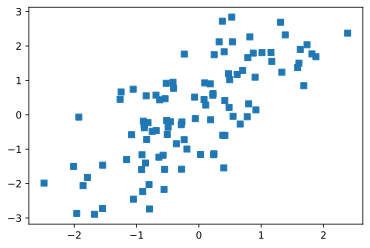

In [29]:
N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N,1)
plt.plot(x,y,'s')
plt.show()

## Splitting into train and test set using sklearn and DataLoader

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2)
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=16)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset))

In [36]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f7fe954ab20>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7fe9479760>)

## Training 

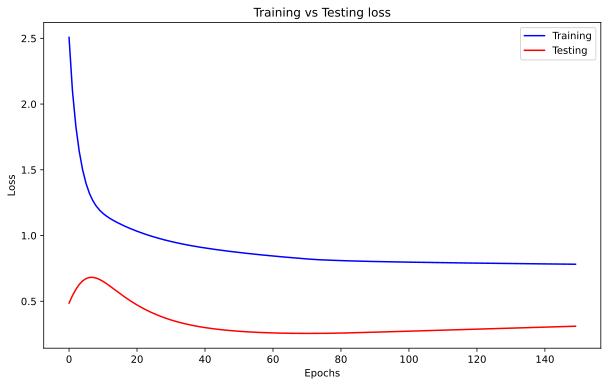

In [52]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
learning_rate = .05
loss_fun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)


num_epochs = 150
train_loss = []
test_loss = []

for epochi in range(num_epochs):
  batch_loss = []
  for x,y in train_loader:
    yHat = ANNreg(x)
    loss = loss_fun(yHat, y)
    batch_loss.append(loss.detach())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss.append(np.mean(batch_loss))
  
  x_test,y_test = next(iter(test_loader))
  y_test_pred = ANNreg(x_test)
  y_test_loss = (y_test_pred.detach() - y_test).pow(2).mean()
  test_loss.append(y_test_loss)


plt.figure(figsize=(10,6))
plt.plot(train_loss, 'b-', label='Training loss')
plt.plot(test_loss, 'r-', label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Testing loss')
plt.legend(['Training', 'Testing'])
plt.show()

In [53]:
print(f'Final training loss: {train_loss[-1]:.2f}')
print(f'Final testing loss: {test_loss[-1]:.2f}')

Final training loss: 0.78
Final testing loss: 0.31
